In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.regression.linear_model import OLS
from sklearn.tree import DecisionTreeClassifier

In [3]:
important_cols = ['agency_abbr', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'action_taken_name', 'state_abbr',
       'county_name', 'census_tract_number', 'applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'co_applicant_race_name_1','applicant_sex_name',
       'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name',
       'denial_reason_name_1', 'hoepa_status_name', 'lien_status_name', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']
df_2017 = pd.read_csv('data/hmda_2017_nationwide_all-records_labels.csv',usecols = important_cols)
df_2017['denied'] = df_2017[['denial_reason_name_1']].applymap(lambda x : 1 if x==x else 0)
df_2017.head()

,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,action_taken_name,state_abbr,county_name,...,denial_reason_name_1,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
0,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,53.0,Not applicable,Application withdrawn by applicant,PA,Philadelphia County,...,NaN,Not a HOEPA loan,Secured by a first lien,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,0
1,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,168.0,Not applicable,Application denied by financial institution,WA,Spokane County,...,Credit history,Not a HOEPA loan,Secured by a first lien,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,1
2,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,103.0,Not applicable,File closed for incompleteness,UT,Salt Lake County,...,NaN,Not a HOEPA loan,Secured by a first lien,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,0
3,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,88.0,Not applicable,Loan originated,MO,Greene County,...,NaN,Not a HOEPA loan,Secured by a first lien,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,0
4,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,90.0,Not applicable,Application withdrawn by applicant,IL,Cook County,...,NaN,Not a HOEPA loan,Secured by a first lien,2910.0,48.660000,77500.0,79.250000,599.0,26.0,0


In [ ]:
df_2017[df_2017['state_abbr'] == 'CA']['county_name'].unique()

array(['Riverside County', 'Alameda County', 'Sacramento County',
       'San Bernardino County', 'Fresno County', 'Contra Costa County',
       'Santa Cruz County', 'Los Angeles County', 'Butte County',
       'Solano County', 'San Diego County', 'San Mateo County',
       'Amador County', 'Orange County', 'Stanislaus County',
       'El Dorado County', 'Santa Clara County', 'Monterey County',
       'Calaveras County', 'Ventura County', 'Glenn County',
       'Madera County', 'Colusa County', 'Tehama County', 'Sutter County',
       'Del Norte County', 'Sonoma County', 'Tulare County',
       'Placer County', 'Humboldt County', 'Nevada County',
       'San Luis Obispo County', 'Merced County', 'San Benito County',
       'Alpine County', 'Kern County', 'Santa Barbara County',
       'San Joaquin County', 'San Francisco County', 'Kings County',
       'Imperial County', 'Shasta County', 'Marin County', 'Napa County',
       nan, 'Yolo County', 'Plumas County', 'Siskiyou County',
     

## Clean Data

In [4]:

sd_df = df_2017[df_2017['county_name'] == 'San Diego County']
sd_df['is_male'] = (sd_df['applicant_sex_name'] == 'Male').astype(int)
columns_to_drop = ['county_name','state_abbr','denial_reason_name_1','hud_median_family_income','action_taken_name','applicant_sex_name']
cleaned_sd_df = sd_df.drop(columns = columns_to_drop).dropna(subset = ['applicant_income_000s','number_of_1_to_4_family_units','loan_amount_000s'])
print(cleaned_sd_df.shape)
encoded_sd_df = pd.get_dummies(cleaned_sd_df)
print(encoded_sd_df.shape)
encoded_sd_df.head()

<ipython-input-4-be3ae3796528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_df['is_male'] = (sd_df['applicant_sex_name'] == 'Male').astype(int)


(139107, 24)
(139107, 75)


,loan_amount_000s,census_tract_number,applicant_income_000s,population,minority_population,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied,is_male,...,"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,hoepa_status_name_HOEPA loan,hoepa_status_name_Not a HOEPA loan,lien_status_name_Not applicable,lien_status_name_Not secured by a lien,lien_status_name_Secured by a first lien,lien_status_name_Secured by a subordinate lien
908,432.0,30.03,84.0,5045.0,75.379997,83.919998,989.0,1608.0,0,1,...,0,0,0,0,0,1,0,0,1,0
1070,273.0,27.05,58.0,4863.0,88.650002,71.419998,834.0,1281.0,1,0,...,0,1,0,0,0,1,0,0,1,0
1184,215.0,31.03,72.0,6686.0,92.209999,80.080002,1184.0,1661.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2786,501.0,29.02,75.0,6846.0,60.240002,86.570000,983.0,1717.0,0,1,...,0,1,0,0,0,1,0,0,1,0
3026,1210.0,1.00,491.0,2716.0,13.030000,222.570007,1114.0,1283.0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [102]:
cleaned_sd_df.isnull().sum(axis = 0).sort_values()

agency_abbr                       0
number_of_owner_occupied_units    0
tract_to_msamd_income             0
minority_population               0
population                        0
lien_status_name                  0
hoepa_status_name                 0
purchaser_type_name               0
applicant_income_000s             0
co_applicant_sex_name             0
applicant_sex_name                0
number_of_1_to_4_family_units     0
co_applicant_race_name_1          0
co_applicant_ethnicity_name       0
applicant_ethnicity_name          0
census_tract_number               0
action_taken_name                 0
preapproval_name                  0
loan_amount_000s                  0
owner_occupancy_name              0
loan_purpose_name                 0
property_type_name                0
loan_type_name                    0
applicant_race_name_1             0
denied                            0
dtype: int64

In [11]:
def find_col(x):
    cols = list(df_2017.columns)
    for col in cols:
        pats = re.findall(col,x)
        if len(pats) > 0:
            return col
    return 0


In [35]:
sorted_denial_rates = df_2017.groupby('state_abbr').mean()[['denied']].sort_values(by = 'denied')
counts_df = df_2017.groupby('state_abbr').count()[['respondent_id']]
grouped_df = sorted_denial_rates.join(counts_df).rename(columns={'denied':'Denial Rate','respondent_id':'Count'})
grouped_df

,Denial Rate,Count
state_abbr,,
WY,0.000000,13
ND,0.000000,32
LA,0.025624,10420
SC,0.029556,21620
NE,0.031270,28750
VA,0.041273,29414
CT,0.044368,28376
PR,0.050000,20
DC,0.052632,19


In [44]:
cutoff1 = .11
cutoff2 = .16
group1 = grouped_df[grouped_df['Denial Rate'] < cutoff1]
count1 = group1['Count'].sum()
group2 = grouped_df[(grouped_df['Denial Rate'] >= cutoff1) & (grouped_df['Denial Rate'] < cutoff2)]
count2 = group2['Count'].sum()
group3 = grouped_df[grouped_df['Denial Rate'] >= cutoff2]
count3 = group3['Count'].sum()

print(count1,count2,count3)

396833 282200 319826


## Analyze Data

applicant_race_name_1
Not applicable                                                                       0.000352
White                                                                                0.089382
Asian                                                                                0.097920
Native Hawaiian or Other Pacific Islander                                            0.103488
Information not provided by applicant in mail, Internet, or telephone application    0.119760
Black or African American                                                            0.134111
American Indian or Alaska Native                                                     0.138360
Name: denied, dtype: float64


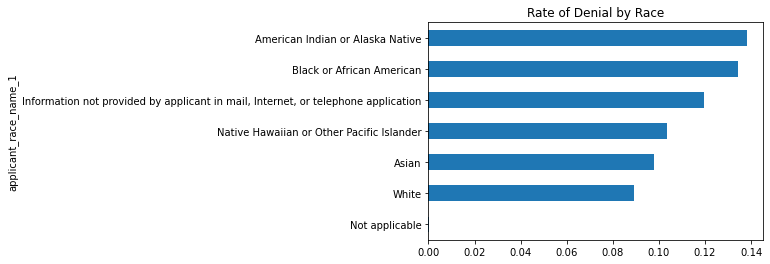

In [29]:
# Plot mean denial by race
mean_denial_by_race = cleaned_sd_df.groupby(['applicant_race_name_1']).mean()['denied'].sort_values()
print(mean_denial_by_race)
mean_denial_by_race.plot(kind='barh', title='Rate of Denial by Race')

applicant_ethnicity_name
Not applicable                                                                       0.001034
Not Hispanic or Latino                                                               0.090465
Information not provided by applicant in mail, Internet, or telephone application    0.112037
Hispanic or Latino                                                                   0.113653
Name: denied, dtype: float64


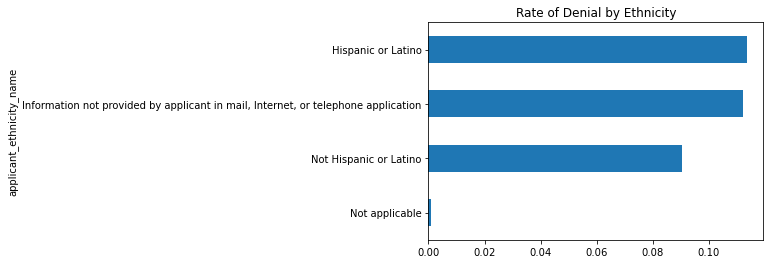

In [31]:
# Plot mean denial by ethnicicity
denial_rate_by_ethnicity = cleaned_sd_df.groupby(['applicant_ethnicity_name']).mean()['denied'].sort_values()
print(denial_rate_by_ethnicity)
denial_rate_by_ethnicity.plot(kind='barh', title='Rate of Denial by Ethnicity')

applicant_sex_name
Not applicable                                                                       0.005278
Male                                                                                 0.090486
Female                                                                               0.100813
Information not provided by applicant in mail, Internet, or telephone application    0.126177
Name: denied, dtype: float64


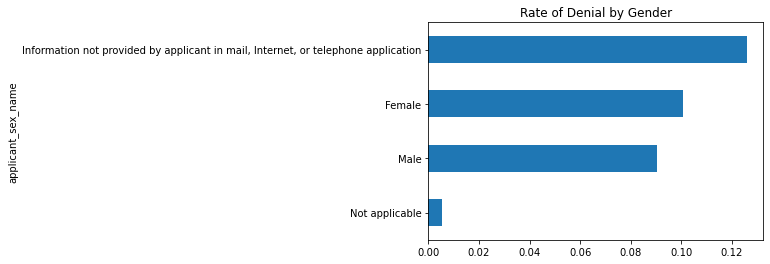

In [34]:
# Plot mean denial by gender
denial_rate_by_gender = sd_df.groupby(['applicant_sex_name']).mean()['denied'].sort_values()
print(denial_rate_by_gender)
denial_rate_by_gender.plot(kind='barh', title='Rate of Denial by Gender')

## Train Model

In [42]:
# All Features
train = encoded_sd_df.drop(columns = ['denied'])
target = encoded_sd_df['denied']
x_train, x_test, y_train, y_test = train_test_split(train,target,test_size = .4)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)
preds = model.predict(train)
print(classification_report(y_train,train_preds,labels = [0,1]))
print(classification_report(y_test,test_preds,labels = [0,1]))
print(classification_report(target,preds,labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75462
           1       1.00      1.00      1.00      8002

    accuracy                           1.00     83464
   macro avg       1.00      1.00      1.00     83464
weighted avg       1.00      1.00      1.00     83464

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     50370
           1       0.29      0.32      0.30      5273

    accuracy                           0.86     55643
   macro avg       0.61      0.62      0.61     55643
weighted avg       0.87      0.86      0.86     55643

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    125832
           1       0.70      0.73      0.71     13275

    accuracy                           0.94    139107
   macro avg       0.84      0.85      0.84    139107
weighted avg       0.95      0.94      0.94    139107



In [45]:
cleaned_sd_df_no_race = cleaned_sd_df.drop(columns = ['applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1','is_male',
       'co_applicant_race_name_1',
       'co_applicant_sex_name'])
encoded_sd_df_no_race = pd.get_dummies(cleaned_sd_df_no_race)
print(encoded_sd_df_no_race.shape)
train_no_race = encoded_sd_df_no_race.drop(columns = ['denied'])
x_train_no_race, x_test_no_race, y_train, y_test = train_test_split(train_no_race,target,test_size = .4)
model_no_race = DecisionTreeClassifier()
model_no_race.fit(x_train_no_race,y_train)
train_preds_no_race = model_no_race.predict(x_train_no_race)
test_preds_no_race = model_no_race.predict(x_test_no_race)
preds_no_race = model_no_race.predict(train_no_race)
print(classification_report(y_train,train_preds_no_race,labels = [0,1]))
print(classification_report(y_test,test_preds_no_race,labels = [0,1]))
print(classification_report(target,preds_no_race,labels = [0,1]))

(139107, 45)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75532
           1       1.00      0.99      1.00      7932

    accuracy                           1.00     83464
   macro avg       1.00      1.00      1.00     83464
weighted avg       1.00      1.00      1.00     83464

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     50300
           1       0.29      0.30      0.29      5343

    accuracy                           0.86     55643
   macro avg       0.61      0.61      0.61     55643
weighted avg       0.86      0.86      0.86     55643

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    125832
           1       0.70      0.71      0.71     13275

    accuracy                           0.94    139107
   macro avg       0.84      0.84      0.84    139107
weighted avg       0.94      0.94      0.94    139107



In [184]:
final_df = encoded_sd_df.copy()
final_df['Model_with_Race_Preds'] = preds
final_df['Model_without_Race_Preds'] = preds_no_race
print(classification_report(preds,preds_no_race,labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139107
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00    139107
   macro avg       0.50      0.50      0.50    139107
weighted avg       1.00      1.00      1.00    139107



C:\Users\maxym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
train_cols = list(train.columns)
train_cols_no_race = list(train_no_race.columns)
coef_df = pd.DataFrame({'Column':train_cols,'Race_coef':model.coef_[0]})
no_race_coef_df = pd.DataFrame({'Column':train_cols_no_race,'No_Race_coef':model_no_race.coef_[0]}).set_index('Column')
all_coef_df = coef_df.join(no_race_coef_df,on = ['Column'],how = 'left')
all_coef_df['coef_diff'] = all_coef_df['Race_coef'] - all_coef_df['No_Race_coef']
all_coef_df['abs_Race_coef'] = abs(all_coef_df['Race_coef'])
all_coef_df

,Column,Race_coef,No_Race_coef,coef_diff,abs_Race_coef
0,loan_amount_000s,-0.000199,-0.000066,-0.000133,0.000199
1,census_tract_number,-0.004118,-0.004224,0.000107,0.004118
2,applicant_income_000s,-0.001615,-0.001588,-0.000027,0.001615
3,population,0.000008,0.000004,0.000003,0.000008
4,minority_population,-0.013378,-0.013155,-0.000223,0.013378
...,...,...,...,...,...
69,hoepa_status_name_Not a HOEPA loan,-0.000292,-0.000298,0.000006,0.000292
70,lien_status_name_Not applicable,-0.000329,-0.000333,0.000004,0.000329
71,lien_status_name_Not secured by a lien,0.000131,0.000141,-0.000010,0.000131
72,lien_status_name_Secured by a first lien,-0.000213,-0.000214,0.000002,0.000213


In [20]:
all_coef_df.sort_values(by = 'coef_diff',ascending=True).head(20)

,Column,Race_coef,No_Race_coef,coef_diff,abs_Race_coef
4,minority_population,-1.337760e-02,-1.315507e-02,-2.225300e-04,1.337760e-02
0,loan_amount_000s,-1.991333e-04,-6.629100e-05,-1.328423e-04,1.991333e-04
6,number_of_owner_occupied_units,1.163530e-04,2.393423e-04,-1.229893e-04,1.163530e-04
2,applicant_income_000s,-1.615197e-03,-1.587941e-03,-2.725597e-05,1.615197e-03
28,preapproval_name_Preapproval was not requested,-2.169228e-04,-1.961224e-04,-2.080038e-05,2.169228e-04
22,loan_purpose_name_Home purchase,-7.107111e-04,-6.989689e-04,-1.174224e-05,7.107111e-04
61,purchaser_type_name_Fannie Mae (FNMA),-6.102665e-04,-5.993778e-04,-1.088871e-05,6.102665e-04
71,lien_status_name_Not secured by a lien,1.312347e-04,1.414654e-04,-1.023064e-05,1.312347e-04
15,loan_type_name_Conventional,-6.196459e-05,-5.314058e-05,-8.824011e-06,6.196459e-05
12,agency_abbr_HUD,-1.039389e-03,-1.031028e-03,-8.361268e-06,1.039389e-03


## Intersectionality Analysis

In [44]:
intersect_df = cleaned_sd_df.copy()
intersect_df['is_asian'] = (intersect_df['applicant_race_name_1'] == 'Asian').astype(int)
intersect_df['is_black'] = (intersect_df['applicant_race_name_1'] == 'Black or African American').astype(int)
intersect_df['is_white'] = (intersect_df['applicant_race_name_1'] == 'White').astype(int)
intersect_df['is_asian_and_male'] = intersect_df['is_asian'] * intersect_df['is_male']
intersect_df['is_black_and_male'] = intersect_df['is_black'] * intersect_df['is_male']
intersect_df['is_white_and_male'] = intersect_df['is_white'] * intersect_df['is_male']
intersect_df = intersect_df[['is_male','is_asian','is_black','is_white','is_asian_and_male','is_black_and_male','is_white_and_male','denied']]
intersect_df.head()

,is_male,is_asian,is_black,is_white,is_asian_and_male,is_black_and_male,is_white_and_male,denied
908,1,0,0,0,0,0,0,0
1070,0,0,0,0,0,0,0,1
1184,0,0,0,0,0,0,0,0
2786,1,0,0,0,0,0,0,0
3026,1,0,0,1,0,0,1,1


In [62]:
lr_model = LinearRegression()
train = intersect_df.drop(columns = ['denied'])
train['Intercept'] = 1
target = intersect_df['denied']
lr_model.fit(train,target)
lr_model.coef_

array([ 0.0044062 ,  0.00884361,  0.03598755, -0.01110411, -0.02884956,
       -0.01597043, -0.01216532,  0.        ])

In [63]:
no_intersect_train = train.drop(columns = ['is_asian_and_male','is_black_and_male','is_white_and_male'])
model = OLS(target,no_intersect_train).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
is_male,-0.0068,0.002,-3.936,0.000,-0.010,-0.003
is_asian,-0.0078,0.003,-2.547,0.011,-0.014,-0.002
is_black,0.0284,0.005,5.820,0.000,0.019,0.038
is_white,-0.0161,0.002,-7.788,0.000,-0.020,-0.012
Intercept,0.1104,0.002,59.624,0.000,0.107,0.114


In [65]:
model = OLS(target,train).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
is_male,0.0044,0.004,1.239,0.215,-0.003,0.011
is_asian,0.0088,0.005,1.785,0.074,-0.001,0.019
is_black,0.0360,0.008,4.269,0.000,0.019,0.053
is_white,-0.0111,0.003,-3.865,0.000,-0.017,-0.005
is_asian_and_male,-0.0288,0.006,-4.509,0.000,-0.041,-0.016
is_black_and_male,-0.0160,0.010,-1.532,0.125,-0.036,0.004
is_white_and_male,-0.0122,0.004,-2.920,0.004,-0.020,-0.004
Intercept,0.1061,0.002,48.167,0.000,0.102,0.110


## Feedback Loop Analysis

In [66]:
# All Features
train = encoded_sd_df.drop(columns = ['denied'])
target = encoded_sd_df['denied']
x_train, x_test, y_train, y_test = train_test_split(train,target,test_size = .4)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)
preds = model.predict(train)
print(classification_report(y_train,train_preds,labels = [0,1]))
print(classification_report(y_test,test_preds,labels = [0,1]))
print(classification_report(target,preds,labels = [0,1]))

c:\Users\maxym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\maxym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     75576
           1       0.00      0.00      0.00      7888

    accuracy                           0.91     83464
   macro avg       0.45      0.50      0.48     83464
weighted avg       0.82      0.91      0.86     83464

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     50256
           1       0.00      0.00      0.00      5387

    accuracy                           0.90     55643
   macro avg       0.45      0.50      0.47     55643
weighted avg       0.82      0.90      0.86     55643

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    125832
           1       0.00      0.00      0.00     13275

    accuracy                           0.90    139107
   macro avg       0.45      0.50      0.47    139107
weighted avg       0.82      0.90      0.86    139107



In [62]:
def add_metrics(name,y,preds,metrics):
       #Accuracy : the proportion of the total number of predictions that were correct.
       t = f'{name}_accuracy'
       df = pd.DataFrame({'true':y,'preds':preds})
       metrics[t] = df[df['true'] == df['preds']].shape[0] / df.shape[0]

       #Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
       t = f'{name}_precision'
       pos_df = df[df['preds'] == 1]
       metrics[t] = pos_df[pos_df['true'] == pos_df['preds']].shape[0] / pos_df.shape[0]

       #Negative Predictive Value : the proportion of negative cases that were correctly identified.
       t = f'{name}_negative_precision'
       pos_df = df[df['preds'] == 0]
       metrics[t] = pos_df[pos_df['true'] == pos_df['preds']].shape[0] / pos_df.shape[0]

       #Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
       t = f'{name}_recall'
       pos_df = df[df['true'] == 1]
       metrics[t] = pos_df[pos_df['true'] == pos_df['preds']].shape[0] / pos_df.shape[0]

       #Specificity : the proportion of actual negative cases which are correctly identified.
       t = f'{name}_specificity'
       pos_df = df[df['true'] == 0]
       metrics[t] = pos_df[pos_df['true'] == pos_df['preds']].shape[0] / pos_df.shape[0]

cl_sd_df = cleaned_sd_df.copy()
cl_sd_df['is_asian'] = (cl_sd_df['applicant_race_name_1'] == 'Asian').astype(int)
cl_sd_df['is_black'] = (cl_sd_df['applicant_race_name_1'] == 'Black or African American').astype(int)
cl_sd_df['is_white'] = (cl_sd_df['applicant_race_name_1'] == 'White').astype(int)

cl_sd_df_no_race = cl_sd_df.drop(columns = ['applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'co_applicant_race_name_1',
       'co_applicant_sex_name'])
encoded_df = pd.get_dummies(cl_sd_df_no_race)

temp_df = encoded_df.copy()
sam1 = temp_df.sample(frac = .5)
sam2 = temp_df.drop(sam1.index)
t1 = sam1.sample(frac = .5)
t2 = sam1.drop(t1.index)
t3 = sam2.sample(frac = .5)
t4 = sam2.drop(t3.index)

data = []

metrics = {'overall_accuracy':[],'is_male_accuracy':[],'is_female_accuracy':[],'is_asian_accuracy':[],'is_black_accuracy':[],'is_white_accuracy':[],'overall_false_pos':[],'is_male_false_pos':[],'is_female_false_pos':[],'is_asian_false_pos':[],'is_black_false_pos':[],'is_white_false_pos':[],'overall_false_neg':[],'is_male_false_neg':[],'is_female_false_neg':[],'is_asian_false_neg':[],'is_black_false_neg':[],'is_white_false_neg':[]}


t1 = t1.reset_index().drop(columns = ['index'])
train = t1.drop(columns = ['denied','is_male','is_asian','is_black','is_white'])
target = t1['denied']
race_and_gender = t1[['is_male','is_asian','is_black','is_white']]
model = DecisionTreeClassifier()
model.fit(train,target)
preds = pd.DataFrame(model.predict(train))
metrics = {}
add_metrics('overall', target, list(preds[0]),metrics)
for group in ['is_male','is_female','is_asian','is_black','is_white']:
       if group == 'is_female':
              tar = target[race_and_gender['is_male'] == 0]
              pr = preds[race_and_gender['is_male'] == 0]
       else:
              tar = target[race_and_gender[group] == 1]
              pr = preds[race_and_gender[group] == 1]   
       add_metrics(group, tar, list(pr[0]),metrics)
data.append(metrics)

for t in [t2,t3,t4]:
       t = t.reset_index().drop(columns = ['index'])
       train = t.drop(columns = ['denied','is_male','is_asian','is_black','is_white'])
       target = model.predict(train)
       true = t['denied']
       race_and_gender = t[['is_male','is_asian','is_black','is_white']]
       model = DecisionTreeClassifier()
       model.fit(train,target)
       preds = pd.DataFrame(model.predict(train))
       metrics = {}
       add_metrics('overall', true, list(preds[0]),metrics)
       for group in ['is_male','is_female','is_asian','is_black','is_white']:
              if group == 'is_female':
                     tar = true[race_and_gender['is_male'] == 0]
                     pr = preds[race_and_gender['is_male'] == 0]
              else:
                     tar = true[race_and_gender[group] == 1]
                     pr = preds[race_and_gender[group] == 1]   
              add_metrics(group, tar, list(pr[0]),metrics)
       data.append(metrics)


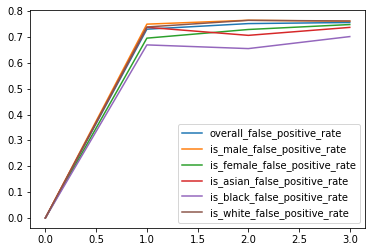

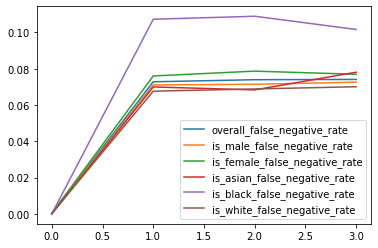

In [80]:
metrics_df = pd.DataFrame(data)
def check_for_substring(x):
        try:
            if len(re.findall('precision',x)) > 0:
                return True
            else: 
                return False
        except:
            return False
cols_to_include = metrics_df.columns[list(map(check_for_substring, list(metrics_df.columns)))]
t_df= metrics_df[cols_to_include].applymap(lambda x : 1-x)
def fix_cols(x):
    x = x.replace('negative_precision','false_negative_rate')
    x = x.replace('precision','false_positive_rate')
    return x
t_df.columns = list(map(fix_cols,t_df.columns))
for pat in ['false_positive_rate','false_negative_rate']:
    def check_for_substring(x):
        try:
            if len(re.findall(pat,x)) > 0:
                return True
            else: 
                return False
        except:
            return False

    cols_to_include = t_df.columns[list(map(check_for_substring, list(t_df.columns)))]
    t_df[cols_to_include].plot.line()

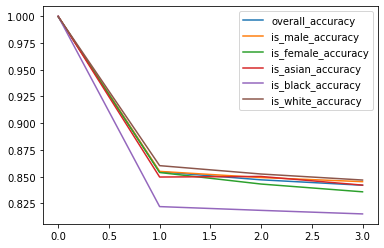

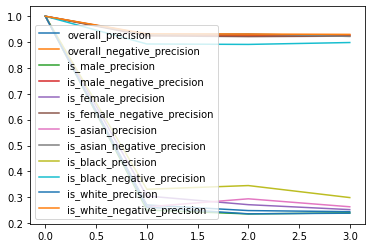

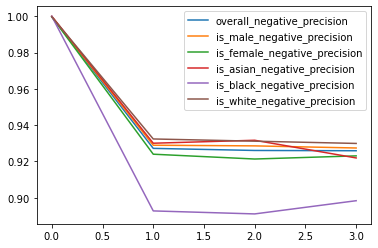

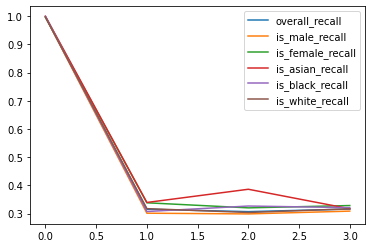

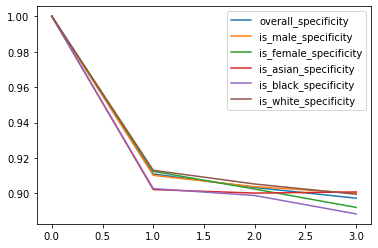

In [75]:
#for pat in ['overall', 'is_male','is_female','is_asian','is_black','is_white']:
for pat in ['accuracy','precision','negative_precision','recall','specificity']:
    def check_for_substring(x):
        try:
            if len(re.findall(pat,x)) > 0:
                return True
            else: 
                return False
        except:
            return False

    cols_to_include = metrics_df.columns[list(map(check_for_substring, list(metrics_df.columns)))]
    metrics_df[cols_to_include].plot.line()